In [183]:
import pandas as pd 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(train.shape[0])
print(test.shape[0])
train.head()


7613
3263


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [154]:
# How balanced is the training set?
print(train.target.value_counts())
print(train[train.keyword.isna()].shape[0])
print(test[test.keyword.isna()].shape[0])

0    4342
1    3271
Name: target, dtype: int64
61
26


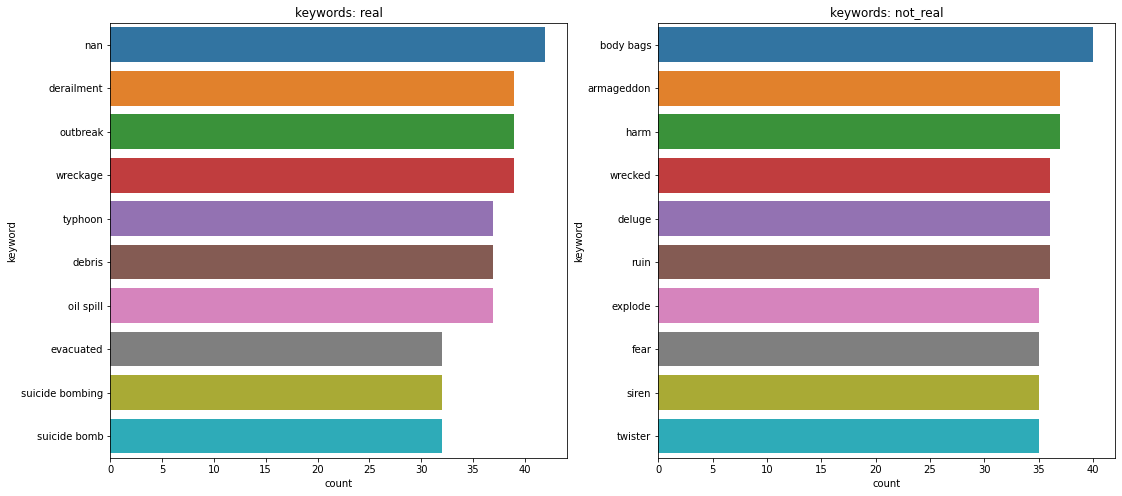

In [48]:
import re
train['keyword']=train['keyword'].fillna('nan')
test['keyword']=test['keyword'].fillna('nan')

# are keywords different?
train.keyword = train.keyword.apply(lambda x: re.sub(r'%20', ' ', x))
test.keyword = test.keyword.apply(lambda x: re.sub(r'%20', ' ', x))

import seaborn
import matplotlib.pyplot as plt
f, axes = plt.subplots(1, 2, figsize=(18, 8))
real = train[train.target==1].copy()
seaborn.countplot(y='keyword',data = real, order = real['keyword'].value_counts().iloc[:10].index,ax=axes[0]).set_title("keywords: real")

not_real = train[train.target==0].copy()
seaborn.countplot(y='keyword',data = not_real, order = not_real['keyword'].value_counts().iloc[:10].index,ax=axes[1]).set_title("keywords: not_real")
plt.show()

In [184]:
import nltk
from nltk.corpus import stopwords
print('before: ' + train.text[7])
print('before: ' + train.text[8])
print('before: ' + train.text[15])

# remove stopwords
for i in stopwords.words('english'):
    train = train.replace(to_replace=r'\b%s\b\s'%i, value=" ",regex=True)
    test = train.replace(to_replace=r'\b%s\b\s'%i, value=" ",regex=True)
print('after stopwords: ' + train.text[7])
print('after stopwords: ' + train.text[8])
print('after stopwords: ' + train.text[15])

# remove hyperlinks
train = train.replace(to_replace=r'http\S+', value="", regex=True)
test = test.replace(to_replace=r'http\S+', value="", regex=True)
print('after hyperlinks: ' + train.text[7])
print('after HL: ' + train.text[8])
print('after HL: ' + train.text[15])

# remove mentions
train = train.replace(to_replace=r'@\S+', value="", regex=True)
test = test.replace(to_replace=r'@\S+', value="", regex=True)
train=train.replace(to_replace=r'Err:\S+', value='error ', regex=True)
test=test.replace(to_replace=r'Err:\S+', value='error ', regex=True)
print('after mentions: ' + train.text[7])
print('after m: ' + train.text[8])
print('after m: ' + train.text[15])

#replace punctuation
train = train.replace(to_replace=r'\...', value=' ', regex=True)
test = test.replace(to_replace=r'\...', value=' ', regex=True)
train = train.replace(to_replace=r'[\'\^\\,@\‘?!\.$%_:\-“’“”\#\/\*]', value='', regex=True)
test = test.replace(to_replace=r'[\'\^\\,@\‘?!\.$%_:\-“’“”\#\/\*]', value='', regex=True)
print('after punctuation: ' + train.text[7])
print('after p: ' + train.text[8])
print('after p: ' + train.text[15])

# make lowercase
train.text = train.text.apply(lambda x: x.lower())
test.text = test.text.apply(lambda x: x.lower())

#replace spaces
train=train.replace(to_replace='\n', value=' ',regex=True)
test=test.replace(to_replace='\n', value=' ',regex=True)
train = train.replace(to_replace=r'    ', value=' ', regex=True)
test = test.replace(to_replace=r'    ', value=' ', regex=True)
train = train.replace(to_replace=r'   ', value=' ', regex=True)
test = test.replace(to_replace=r'   ', value=' ', regex=True)
train = train.replace(to_replace=r'  ', value=' ', regex=True)
test = test.replace(to_replace=r'  ', value=' ', regex=True)
print('after spaces: ' + train.text[7])
print('after s: ' + train.text[8])
print('after s: ' + train.text[15])

dodgy = [5984, 6594, 5987, 5988, 6597, 6626, 4234, 6602, 6623, 5998, 783, 6618, 5115, 6620, 5983]
for i in dodgy:
    print(train.text[i])

before: I'm on top of the hill and I can see a fire in the woods...
before: There's an emergency evacuation happening now in the building across the street
before: What's up man?
after stopwords: I'  top   hill  I  see  fire   woods...
after stopwords: There'  emergency evacuation happening    building across  street
after stopwords: What'  man?
after hyperlinks: I'  top   hill  I  see  fire   woods...
after HL: There'  emergency evacuation happening    building across  street
after HL: What'  man?
after mentions: I'  top   hill  I  see  fire   woods...
after m: There'  emergency evacuation happening    building across  street
after m: What'  man?
after punctuation: I  top   hill  I  see  fire   woods 
after p: There  emergency evacuation happening    building across  street
after p: What  man
after spaces: i top hill i see fire woods 
after s: there emergency evacuation happening building across street
after s: what man
screams distance 
truth news bbc cnn islam truth god isis terrori

In [ ]:
#from nltk.stem import WordNetLemmatizer 

# tokenize and lemmatize
#lemmatizer = WordNetLemmatizer() 
#train['text'] = train.text.apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])
#test['text'] = test.text.apply(lambda x: [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(x)])

#print(train.text[3])

In [185]:
from num2words import num2words as n2w
train['text'] = train.text.apply(lambda x: ' '.join([n2w(int(word)) if word.isdigit() else word for word in x.split(' ')]))
test['text'] = test.text.apply(lambda x:  ' '.join([n2w(int(word)) if word.isdigit() else word for word in x.split(' ')]))

print(train.text)

0       our deeds reason earthquake may allah forgive ...
1                    forest fire near la ronge sask anada
2       all residents asked shelter place notified off...
3       thirteen thousand people receive wildfires eva...
4       just got sent photo ruby alaska smoke wildfire...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609     the control wild fires california even northe...
7610                   m1 [0104 utc]5km s volcano hawaii 
7611    police investigating ebike collided car little...
7612    the latest more homes razed northern californi...
Name: text, Length: 7613, dtype: object


In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(train.text)
dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
print(dictionary)

{'0000': 9.244596756382498, '00037': 9.244596756382498, '0104': 8.839131648274332, '0111': 9.244596756382498, '039': 9.244596756382498, '05': 9.244596756382498, '05th': 9.244596756382498, '06jst': 9.244596756382498, '0802pm': 9.244596756382498, '08052015': 9.244596756382498, '080615': 9.244596756382498, '0day': 8.551449575822552, '0npzp': 9.244596756382498, '10': 9.244596756382498, '1000': 9.244596756382498, '1000s': 9.244596756382498, '1008pla': 9.244596756382498, '1008planet': 9.244596756382498, '100bn': 9.244596756382498, '100mb': 9.244596756382498, '100nd': 9.244596756382498, '100s': 9.244596756382498, '1015pm': 9.244596756382498, '1030pm': 8.551449575822552, '1038pm': 8.839131648274332, '1040pm': 9.244596756382498, '10am': 9.244596756382498, '10k': 9.244596756382498, '10km': 8.839131648274332, '10m': 9.244596756382498, '10monthold': 9.244596756382498, '10news': 9.244596756382498, '10pm': 9.244596756382498, '10th': 8.145984467714388, '10w': 9.244596756382498, '10x': 9.2445967563824

In [ ]:
#get tfidf weighted glove vector
import spacy
import numpy as np
nlp = spacy.load("en_core_web_md")  

def glove_weighted(text_series,norm=True, dictionary=dictionary):
    features = np.empty((0,300), float)
    for sentence in text_series:
        arr = np.zeros((1,300))
        count = 0
        for word in sentence.split(' '):
            if norm: # can choose to weight feature by idf
                if nlp(word).vector.any() and (word in dictionary):
                    arr += nlp(word).vector*dictionary[word]
                    count += 1
            else:
                if nlp(word).vector.any():
                    arr += nlp(word).vector
                    count += 1
        arr = arr/count
        features = np.vstack((features,arr))
    return features

train_features = glove_weighted(train.text,norm=True)
test_features = glove_weighted(test.text,norm=True)

In [162]:
inds = np.where(np.isnan(train_features))
for i in inds:
    print(list(set(i)))

screams distance 
truth news bbc cnn islam truth god isis terror  quran lies 
screams internally
screams 
truth news bbc cnn islam truth god isis terror  quran lies 
truth news bbc cnn islam truth god isis terror  quran lies 
 toxiccancerdiseasehazardous wastenoxious
truth news bbc cnn islam truth god isis terror  quran lies 
truth news bbc cnn islam truth god isis terror  quran lies 
 screams
 blight
truth news bbc cnn islam truth god isis terror  quran lies 
error 
truth news bbc cnn islam truth god isis terror  quran lies 
 screams 666


In [88]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
clf = svm.SVC()
scores = cross_val_score(clf, train_features, train.target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
clf = svm.SVC().fit(train_features, train.target)
pred = pd.DataFrame({'id':test.id,'target': clf.predict(test_features)})
pred.to_csv('submission.csv',index=False)